In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
#training_set -> Dog, Cat
#testing_set -> Dog, Cat

In [67]:
training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [8]:
training_set.filenames[1]

'cats\\cat.10.jpg'

In [15]:
img = tf.keras.preprocessing.image.load_img('training_set\cats\\cat.1.jpg')

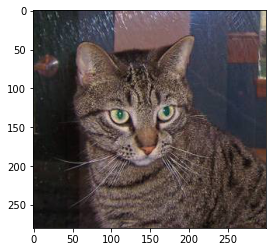

In [16]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [17]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [68]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 22 images belonging to 2 classes.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D,Flatten

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(filters=32, 
                 kernel_size=3, 
                 activation='relu', 
                 padding='valid',
                 input_shape=[64, 64, 3]))

In [20]:
model.add(MaxPool2D(pool_size = 2))

In [21]:
model.add(Conv2D(filters=32,
                 kernel_size = 3,
                 activation = 'relu'
                 ))

In [22]:
model.add(MaxPool2D(pool_size = 2))

In [23]:
model.add(Flatten())

In [24]:
model.add(Dense(units=32, activation = 'relu'))
#model.add(Dense(units=8, activation = 'relu'))

In [25]:
model.add(Dense(units=1, activation='sigmoid'))

In [26]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 32)               

In [28]:
model.fit(training_set, validation_data=test_set, epochs=10)

Epoch 1/10
250/250 [==============================] - 203s 808ms/step - loss: 0.6645 - accuracy: 0.5935 - val_loss: 0.8648 - val_accuracy: 0.5909
Epoch 2/10
250/250 [==============================] - 86s 344ms/step - loss: 0.5997 - accuracy: 0.6815 - val_loss: 0.5942 - val_accuracy: 0.6364
Epoch 3/10
250/250 [==============================] - 85s 338ms/step - loss: 0.5671 - accuracy: 0.7116 - val_loss: 0.5497 - val_accuracy: 0.6818
Epoch 4/10
250/250 [==============================] - 83s 330ms/step - loss: 0.5324 - accuracy: 0.7308 - val_loss: 0.6638 - val_accuracy: 0.6818
Epoch 5/10
250/250 [==============================] - 83s 330ms/step - loss: 0.5161 - accuracy: 0.7479 - val_loss: 0.5535 - val_accuracy: 0.7273
Epoch 6/10
250/250 [==============================] - 93s 372ms/step - loss: 0.4908 - accuracy: 0.7607 - val_loss: 0.6429 - val_accuracy: 0.6364
Epoch 7/10
250/250 [==============================] - 84s 334ms/step - loss: 0.4769 - accuracy: 0.7674 - val_loss: 0.2755 - val_a

In [29]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [139]:
#test_img = image.load_img('photo-1529778873920-4da4926a72c2.jpg',target_size = (64, 64,3))
#test_img = image.load_img('photo-1529778873920-4da4926a72c2.jpg',target_size = (224, 224,3))
test_img = image.load_img('photo-1529778873920-4da4926a72c2.jpg',target_size = (224, 224,3))

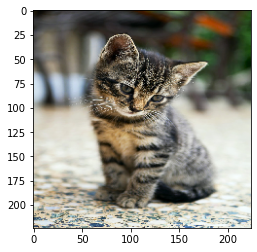

In [140]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [60]:
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)
test_img = test_img/255

In [61]:
result = model.predict(test_img)

In [62]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [63]:
result

array([[0.56312776]], dtype=float32)

In [64]:
if np.round(result[0][0]) == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog


# Transfer Learning

In [100]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False)
mobile_net.trainable=False

In [101]:
trf_learn = Sequential()

In [102]:
trf_learn.add(mobile_net)

In [103]:
trf_learn.add(Flatten())
trf_learn.add(Dense(32, activation = 'relu'))

In [104]:
trf_learn.add(Dense(1, activation = 'sigmoid'))

In [105]:
trf_learn.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [106]:
trf_learn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_9 (Dense)             (None, 32)                2007072   
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,265,089
Trainable params: 2,007,105
Non-trainable params: 2,257,984
_________________________________________________________________


In [107]:
trf_learn.fit(training_set, validation_data = test_set, epochs = 3)

Epoch 1/3
250/250 [==============================] - 432s 2s/step - loss: 0.4123 - accuracy: 0.9580 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 2/3
250/250 [==============================] - 440s 2s/step - loss: 0.1671 - accuracy: 0.9758 - val_loss: 5.2868e-04 - val_accuracy: 1.0000
Epoch 3/3
250/250 [==============================] - 445s 2s/step - loss: 0.0976 - accuracy: 0.9835 - val_loss: 0.8943 - val_accuracy: 0.8636


In [141]:
test_img = image.load_img('5484d9d1eab8ea3017b17e29.jpg',target_size = (224, 224,3))

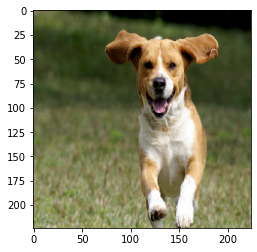

In [142]:
plt.imshow(test_img)

In [143]:
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)
test_img = test_img/255

In [144]:
result = trf_learn.predict(test_img)

In [145]:
result

array([[1.]], dtype=float32)

In [146]:
if np.round(result[0][0]) == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog


In [114]:
trf_learn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_9 (Dense)             (None, 32)                2007072   
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,265,089
Trainable params: 2,007,105
Non-trainable params: 2,257,984
_________________________________________________________________


In [149]:
trf_learn.predict(test_set)

array([[1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [4.6944618e-04],
       [1.0000000e+00],
       [1.0000000e+00],
       [7.6103199e-01],
       [1.0000000e+00],
       [9.9999946e-01],
       [1.0000000e+00],
       [3.5662889e-02],
       [1.0000000e+00],
       [2.2390485e-04],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)